<font color="#5254A3" size=20><b>Telecom X - ETL</b></font>

<font size=4>Processo de ETL e análise de evasão de clientes da empresa de telecomunicações Telecom X</font>.

#📚 Importando Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#📌 Extracão

In [3]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

data = pd.read_json(url)

#🔧 Transformação

## Conhecendo o Dataset

In [4]:
data.head(3)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [5]:
data.shape

(7267, 6)

In [6]:
data.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

#### Normalizando os dados

In [7]:
selected_columns = ['customer', 'phone', 'internet', 'account']

data = pd.json_normalize(data.to_dict(orient='records'))
data.columns = [c.split('.', 1)[1] if c.split('.', 1)[0] in selected_columns else c for c in data.columns]

In [8]:
data.head(3)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85


In [9]:
data.shape

(7267, 21)

In [10]:
data.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

#### Deixando todas as colunas com a primeira letra maiúscula

In [11]:
data.columns = [col[0].upper() + col[1:] if col and col[0].islower() else col for col in data.columns]
data.columns

Index(['CustomerID', 'Churn', 'Gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'Tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

#### Obtendo os tipos de dados das colunas e outras informações

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   Gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   Tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


## Verificando Inconsistências nos Dados

Nesta etapa, serão feitas verificações para identificar possíveis problemas nos dados que possam comprometer a análise.

#### Checando se há valores nulos no DataFrame

In [13]:
data.isnull().sum()

,0
CustomerID,0
Churn,0
Gender,0
SeniorCitizen,0
Partner,0
Dependents,0
Tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


#### Detectando inconsistências

In [14]:
for col in data.columns:
  print(f'{col}: {data[col].unique()}')

CustomerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes' '']
Gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
Tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Cr

#### Obtendo os valores vazios do DataFrame

In [15]:
# Aplica strip nas colunas de texto
data = data.apply(lambda col: col.str.strip() if col.dtypes == 'object' else col)

(data == '').sum()

,0
CustomerID,0
Churn,224
Gender,0
SeniorCitizen,0
Partner,0
Dependents,0
Tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


#### Verificando a proporção dos valores em branco na coluna 'Churn'

In [16]:
(data['Churn'].value_counts(normalize=True) * 100).round(2).reset_index(name='Percentage(%)')

,Churn,Percentage(%)
0,No,71.20
1,Yes,25.72
2,,3.08


#### Avaliando se há presença de valores duplicados no conjunto de dados

In [17]:
data.duplicated().sum()

np.int64(0)

## Tratando as Inconsistências

Não foram encontrados valores nulos ou dados duplicados na base de dados, no entanto, algumas inconsistências foram encontradas:

1. Valores vazios nas colunas "Churn" e "Charges.Total";
2. O campo "Charges.Total", que deveria ser do tipo float, está como tipo object.

#### Tratando os valores em branco da coluna "Churn"

Como os valores em branco da coluna 'Churn' representam apenas 3,08% dos dados, em vez de preenchê-los com 'Yes' ou 'No', optei por excluir as linhas correspondentes do dataframe, para evitar a introdução de viés na análise.

In [18]:
data.shape[0]

7267

In [19]:
data = data[data['Churn'].str.strip() != '']

In [20]:
data.shape[0]

7043

In [21]:
data['Churn'].unique()

array(['No', 'Yes'], dtype=object)

#### Tratando os valores em branco da coluna "Charges.Total"

Observa-se que os campos em branco da coluna Charges.Total correspondem às linhas em que o tempo de permanência (tenure) é igual a 0, indicando que se trata de clientes que ainda não completaram um mês na empresa.

In [22]:
data[data['Charges.Total'] == '']

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


Verificando se tenure igual a 0 coincide com o número de linhas dos campos em branco de Charges.Total.

In [23]:
(data['Tenure'] == 0).sum()

np.int64(11)

Eliminando os registros com linhas em branco da coluna "Charges.Total" e convertendo-a para o tipo float

In [24]:
data = data[data['Charges.Total'].str.strip() != '']
data['Charges.Total'] = data['Charges.Total'].astype(np.float64)

In [25]:
data['Charges.Total'].isnull().sum()

np.int64(0)

In [26]:
(data['Charges.Total']).dtypes

dtype('float64')

#### Convertendo a coluna **"SeniorCitizen"** para o tipo boolean.

In [27]:
data['SeniorCitizen'] = data['SeniorCitizen'].astype(bool)

## Criando nova coluna

#### Criando a coluna "Charges.Daily", que armazena os valores dos gastos diários

In [28]:
data['Charges.Daily'] = ((data['Charges.Total'] / data['Tenure']) / 30).round(2)

In [29]:
data.head(3)

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Daily
0,0002-ORFBO,No,Female,False,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.20
1,0003-MKNFE,No,Male,False,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.01
2,0004-TLHLJ,Yes,Male,False,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.34


#📊 Carga e análise

## Análise descritiva

#### Análise descritiva das colunas numéricas

In [30]:
data.describe()

,Tenure,Charges.Monthly,Charges.Total,Charges.Daily
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,2.159879
std,24.545260,30.085974,2266.771362,1.006217
min,1.000000,18.250000,18.800000,0.460000
25%,9.000000,35.587500,401.450000,1.207500
50%,29.000000,70.350000,1397.475000,2.350000
75%,55.000000,89.862500,3794.737500,3.010000
max,72.000000,118.750000,8684.800000,4.050000


#### Análise descritiva das colunas categóricas

In [31]:
data.describe(include='O')

,CustomerID,Churn,Gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,9995-HOTOH,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,1,5163,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365


#### Separando colunas numéricas e categóricas

In [32]:
numeric_columns = ['Tenure',	'Charges.Monthly',	'Charges.Total',	'Charges.Daily']

In [33]:
categorical_columns = ['Churn', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [34]:
df_numeric_columns = data[numeric_columns]
df_numeric_columns.head()

,Tenure,Charges.Monthly,Charges.Total,Charges.Daily
0,9,65.6,593.30,2.20
1,9,59.9,542.40,2.01
2,4,73.9,280.85,2.34
3,13,98.0,1237.85,3.17
4,3,83.9,267.40,2.97


In [35]:
df_categorical_columns =  data[categorical_columns]
df_categorical_columns.head()

,Churn,Gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,No,Female,False,Yes,Yes,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check
1,No,Male,False,No,No,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check
2,Yes,Male,False,No,No,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check
3,Yes,Male,True,Yes,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
4,Yes,Female,True,Yes,No,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check


### Definição de variáveis e estilos

##### Definindo as cores para as visualizações

In [36]:
gray_1 = '#444'
gray_2 = '#585858'
gray_3 = '#797979'
gray_4 = '#858585'
gray_5 = '#EBEBEB'
purple_1 = '#393B79'
purple_2 = '#5254A3'
pink_1 = '#C4285A'
pink_2 = '#DE4968'
green_1 = '#417568'
green_2 = '#559184'

##### Configurando estilo do gráfico

In [37]:
sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (10, 5)

##### Dicionários para Tradução de colunas e valores

In [38]:
data.columns

Index(['CustomerID', 'Churn', 'Gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'Tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
       'Charges.Daily'],
      dtype='object')

In [39]:
columns_translate = {
    'Churn': 'Evasão', 'Gender': 'Sexo', 'SeniorCitizen': 'Idoso(a)', 'Partner': 'Casado(a)', 'Dependents': 'Dependentes',
    'Tenure': 'Tempo de Permanência', 'PhoneService': 'Serviço Telefônico', 'MultipleLines': 'Múltiplas Linhas Telefonicas',
    'InternetService': 'Serviço de Internet', 'OnlineSecurity': 'Segurança Online', 'OnlineBackup': 'Backup Online',
    'DeviceProtection': 'Proteção de Dispositivos', 'TechSupport': 'Suporte Técnico', 'StreamingTV': 'Streaming de TV',
    'StreamingMovies': 'Streaming de Filmes', 'Contract': 'Tipo de Contrato', 'PaperlessBilling': 'Fatura Online',
    'PaymentMethod': 'Método de Pagamento', 'Charges.Monthly': 'Cobrança Mensal', 'Charges.Total': 'Cobrança Total', 'Charges.Daily': 'Cobrança Diária'
}

values_translate = {
    'Yes': 'Sim', 'No': 'Não', 'True': 'Sim', 'False': 'Não', True: 'Sim', False: 'Não', 'Female': 'Feminino', 'Male': 'masculino',
    'No phone service': 'Sem serviço telefônico', 'No internet service': 'Sem serviço de internet',
    'One year': 'Anual', 'Month-to-month': 'Mensal', 'Two year': 'Dois anos', 'Fiber optic': 'Fibra óptica',
    'Mailed check': 'Cheque enviado pelo correio', 'Electronic check': 'Cheque eletrônico',
    'Credit card (automatic)': 'Cartão de crédito', 'Bank transfer (automatic)': 'Transferência bancária'
}

## Distribuição da Evasão

#### Proporção entre evasões e não evasões

In [40]:
frequency = data['Churn'].value_counts(dropna=False)
percentage = data['Churn'].value_counts(normalize=True) * 100

churn_proportion = pd.DataFrame({
    'Frequency': frequency,
    'Percentage (%)': percentage.round(2)
})

churn_proportion

,Frequency,Percentage (%)
Churn,,
No,5163,73.42
Yes,1869,26.58


##### Função do gráfico de proporção entre evasões e não evasões

In [41]:
def graph_churn_proportion():
  churn_proportion = data['Churn'].value_counts()
  colors = [purple_1 if k == 'No' else (pink_1 if k == 'Yes' else gray_3) for k in churn_proportion.index]
  labels = churn_proportion.index.map(values_translate)

  fig, ax = plt.subplots(figsize=(6, 6))
  fig.suptitle('Taxa de Evasão', fontsize=19, y=0.92)
  wedges, texts, autotexts = ax.pie(churn_proportion, autopct='%1.1f%%', colors=colors, labels=labels, pctdistance=0.8,
          wedgeprops=dict(width=0.4, edgecolor='w'), textprops={'color': gray_1, 'fontsize': 12}
  )

  for text in autotexts:
    text.set(color=gray_5, fontsize=11)

  legend_labels = [f'{count} {"Evadiram" if label == "Sim" else "Não evadiram"}' for label, count in zip(labels, churn_proportion.values)]

  legend = plt.legend(wedges, legend_labels, title='Número de ocorrências', labelspacing=0.8, loc='best', bbox_to_anchor=(0.4, 0.11))
  legend.get_title().set_fontsize(10)

  plt.tight_layout()

  plt.show()

## Evasão por Variáveis Categóricas

##### Funções para ajustar legendas

In [42]:
def rename_column(col):
  col_lower = col.lower()
  if col_lower in 'casado(a)':
    return f'Estado Civil'
  elif col_lower in 'idoso(a)':
    return f'Faixa Etária'
  elif col_lower in 'dependentes':
    return f'Clientes com Dependentes'
  else:
    return f'{col}'

def legend_title(col):
  col_lower = col.lower()
  if col_lower in 'casado(a)':
    return f'Evasão por Estado Civil'
  elif col_lower in 'idoso(a)':
    return f'Evasão por Faixa Etária'
  elif col_lower in 'dependentes':
    return f'Evasão de Clientes com Dependentes'
  else:
    return f'Evasão por {col}'

def legend_label(col, value):
  col_lower = col.lower()
  value_lower = value.lower()
  if col_lower in 'casado(a)':
    return 'Casado(a)' if value_lower == 'sim' else f'Não casado(a)'
  elif col_lower in 'idoso(a)':
    return 'A partir de 60 anos' if value_lower == 'sim' else 'Menos de 60 anos'
  elif col_lower in 'dependentes':
    return 'Possui dependentes' if value_lower == 'sim' else 'Não possui dependentes'
  elif col_lower in 'fatura online':
    return 'Possui' if value_lower == 'sim' else 'Não possui'
  elif col_lower in 'evasão':
    return value
  else:
    return 'Possui o serviço' if value_lower == 'sim' else ('Não possui o serviço' if value_lower == 'não' else value)

##### Função para renderizar os gráficos com as taxas das evasões pelas variáveis categóricas

In [43]:
def graph_churn_rates_categorical():
    figure = plt.figure(figsize=(20, 20))
    plt.suptitle('Proporção e Taxas de Evasão por Categorias', fontsize=26)
    columns_no_churn = [col for col in categorical_columns if col != 'Churn']
    colors = [purple_1, pink_1, green_1, gray_3]

    for i, column in enumerate(columns_no_churn):
        ax = figure.add_subplot(4, 4, i + 1)
        ax.set_facecolor(gray_3)

        churn_rates = df_categorical_columns.groupby(column)['Churn'].apply(lambda x: (x == 'Yes').mean())
        churn_rates = churn_rates.sort_values(ascending=False)
        labels = [values_translate.get(val, val) for val in churn_rates.index]

        wedges, texts, autotexts = ax.pie(churn_rates.values, autopct='%1.1f%%', startangle=0, colors=colors[:len(churn_rates)],
                                          pctdistance=0.74, textprops={'color': 'w', 'fontsize': 11}, wedgeprops=dict(width=0.5, edgecolor='w'))

        legend_labels = [f'{legend_label(columns_translate.get(column, column), label)} - {rate:.1%} Evadiram' for label, rate in zip(labels, churn_rates.values)]
        legend = ax.legend(wedges, legend_labels, title=f'Taxa de {legend_title(columns_translate.get(column, column))}',
                           labelspacing=0.8, borderpad=0.8, loc='upper center', bbox_to_anchor=(0.5, 0.07))
        legend.get_title().set_fontsize(11.5)

        ax.set_title(legend_title(columns_translate.get(column, column)), fontsize=14)

    plt.tight_layout(rect=[0, 0, 0.85, 0.95], h_pad=2.5)
    plt.show()

##### Função para retornar propoções de evasão por categoria

In [44]:
def churn_category_proportion(column):
    df_category_proportion = (data.groupby(column)['Churn'].value_counts().rename("Count").reset_index())

    df_category_proportion['Percentage (%)'] = (
        data.groupby(column)['Churn'].value_counts(normalize=True).mul(100).round(2).values
    )

    return df_category_proportion

#### Evasões por Faixa Etária

In [45]:
churn_category_proportion('SeniorCitizen')

,SeniorCitizen,Churn,Count,Percentage (%)
0,False,No,4497,76.35
1,False,Yes,1393,23.65
2,True,No,666,58.32
3,True,Yes,476,41.68


In [46]:
churn_senior_citizen = pd.DataFrame({
    'NoSeniorCitizen': data[data['SeniorCitizen'] == False]['Churn'].value_counts(),
    'SeniorCitizen': data[data['SeniorCitizen'] == True]['Churn'].value_counts()
})

churn_senior_citizen.reset_index()

,Churn,NoSeniorCitizen,SeniorCitizen
0,No,4497,666
1,Yes,1393,476


##### Função para plotar gráficos de evasões por faixa etária

In [47]:
def graph_churn_senior_citizen():
  fig, axes = plt.subplots(1, 2, figsize=(10, 5))
  fig.suptitle('Evasão por Faixa Etária', fontsize=20)
  titles = ['Clientes com Menos de 60 Anos', 'Clientes com 60 Anos ou Mais']

  for i in range(2):
    values = churn_senior_citizen['NoSeniorCitizen'] if i == 0 else churn_senior_citizen['SeniorCitizen']
    colors = [[green_2 if k == 'No' else gray_4 for k in values.index],
              [purple_2 if k == 'No' else gray_4 for k in values.index]]

    wedges, texts, autotexts = axes[i].pie(
        values, autopct='%1.1f%%', colors=colors[i], pctdistance=0.79, startangle=30 if i == 1 else 0,
        wedgeprops=dict(width=0.4, edgecolor='w'), textprops={'color': gray_5, 'fontsize': 11}
    )

    legend_title = titles[i]
    legend_label = [f'{values.iloc[n]} Não Evadiram' if n == 0 else f'{values.iloc[n]} Evadiram' for n in range(len(values))]
    legend = axes[i].legend(legend_label, title=legend_title, loc="upper center", alignment='left',
                            labelspacing=0.8, borderpad=0.8, bbox_to_anchor=(0.5, 0.05))
    legend.get_title().set_y(1.5)
    handletextpad=1.5

  plt.tight_layout()
  plt.show()

##### Funções para gráficos de evasões por duas categorias

In [48]:
# Função para costumizar legendas
def custom_legend(ax, column):
  handles, legend_labels = ax.get_legend_handles_labels()
  legend_labels = [legend_label(columns_translate.get(column), values_translate.get(label, label))
  for label in legend_labels]
  ax.legend(handles, legend_labels, title=rename_column(columns_translate.get(column)))

def custom_xticks(ax, column):
  xticks = [values_translate.get(tick.get_text(), tick.get_text()) for tick in ax.get_xticklabels()]
  ticks = ax.get_xticks()
  ax.set_xticks(ticks)
  ax.set_xticklabels([legend_label(column, xtick) for xtick in xticks])

####################################################################################################

def plot_grouped_bar(column1, column2, colors, rotation=0):
  data['Churn_num'] = data['Churn'].map({'Yes': 1, 'No': 0})
  taxas = data.groupby([column1, column2])['Churn_num'].mean().reset_index()
  taxas['Churn_num'] = taxas['Churn_num'] * 100

  ax = sns.barplot(data=taxas, x=column2, y='Churn_num', hue=column1, palette=colors)
  renamed_column1 = rename_column(columns_translate.get(column1))
  renamed_column2 = rename_column(columns_translate.get(column2))
  plt.title(f'Taxa de Evasão por {renamed_column1} e {renamed_column2}\n', fontsize=18)
  plt.ylabel('Taxa de Evasão (%)')
  plt.xlabel(rename_column(columns_translate.get(column2)), rotation=rotation)
  custom_xticks(ax, column2)
  custom_legend(ax, column1)

  plt.show()

####################################################################################################

def graph_churn_senior_contract():
  plot_grouped_bar('SeniorCitizen', 'Contract', (purple_1, pink_1))

def graph_churn_partner_contract():
  plot_grouped_bar('Partner', 'Contract', (purple_1, green_1))

def graph_churn_internet_payment():
  plot_grouped_bar('InternetService', 'PaymentMethod', (green_1, pink_1, purple_1))

def graph_churn_contract_payment():
  plot_grouped_bar('Contract', 'PaymentMethod', (purple_1, green_1, pink_1))

## Evasão por Variáveis Numéricas

##### Função para histograma

In [49]:
def graph_churn_tenure_hist():
  fig = plt.figure(figsize=(10.7, 5))
  ax = sns.histplot(data=data, x='Tenure', hue='Churn', kde=True,
                    element='step', palette={'Yes': pink_1, 'No': purple_1})
  plt.title('Evasão por Tempo de Permanência\n', fontsize=17)
  plt.xlabel('\nTempo de Permanência (meses)', fontsize=11)
  plt.ylabel('Distribuição dos Clientes', fontsize=11)
  plt.yticks([])

  legend = ax.get_legend()

  for text in legend.get_texts():
      current_text = text.get_text()
      new_text = values_translate.get(current_text, current_text)
      text.set_text(new_text)

  legend.set_title('Evasão')
  legend.set_bbox_to_anchor((0.6, 0.97))

  plt.grid(False)
  plt.show()

##### Função para gráfico de cobrança mensal por serviço de internet

In [50]:
def graph_charges_monthly_internet():
  colors = [purple_1, pink_1, green_1]
  order = data.groupby('InternetService')['Charges.Monthly'].mean().sort_values(ascending=False).index
  ax = sns.barplot(data=data, x='InternetService', y='Charges.Monthly', hue='InternetService',
              palette=colors, order=order, errorbar=None)
  plt.title('Cobrança Mensal por Serviço de Internet\n', fontsize=17)
  plt.xlabel('Serviço de Internet', fontsize=11)
  plt.ylabel('Cobrança Mensal (R$)', fontsize=11)
  custom_xticks(ax, 'InternetService')

##### Funções para gráficos de boxplot

In [51]:
def boxplot(column1, column2, colors=[]):
  if len(colors) == 0: colors = [purple_2, pink_2]
  fig = plt.figure()
  ax = sns.boxplot(data=data, x='Churn', y=column1, hue=column2, palette=colors)
  renamed_column1 = rename_column(columns_translate.get(column1))
  renamed_column2 = rename_column(columns_translate.get(column2))
  plt.title(f'Distribuição da Evasão por {renamed_column1} e {renamed_column2}\n', fontsize=16)
  plt.xlabel('Evasão')
  plt.ylabel(f'{columns_translate.get(column1)} (R$)')
  custom_xticks(ax, 'Evasão')
  custom_legend(ax, column2)
  ax.get_legend().set_loc('best')
  return fig, ax

def graph_churn_monthly_senior():
  boxplot('Charges.Monthly', 'SeniorCitizen')

def graph_churn_monthly_partner():
  colors = [purple_2, green_2]
  fig, ax = boxplot('Charges.Monthly', 'Partner', colors=colors)
  legend = ax.get_legend()
  legend.set_loc('center')
  legend.set_bbox_to_anchor((0.5, 0.88))

##### Função para gráficos de linha

In [52]:
def lineplot(column, colors=[]):
  if len(colors) == 0: colors = [purple_1, pink_2]
  ax = sns.lineplot(data=data, x='Tenure', y=column, hue='Churn', style='Churn', palette=colors)
  custom_legend(ax, 'Churn')

  plt.title(f'Evasão por Tempo de Permanência e {columns_translate.get(column)}\n', fontsize=18)
  plt.xlabel('Tempo de Permanência (meses)')
  plt.ylabel(f'{columns_translate.get(column)} (R$)')
  plt.show()

### Salvando a base de dados tratada

In [53]:
data.to_csv('TelecomX_Data_Clean.csv', index=False)

#📄Relatorio Final

A Telecom X, empresa do setor de telecomunicações, enfrenta um elevado índice de evasão de clientes e busca compreender as possíveis causas desse problema. O objetivo desta análise é extrair, tratar e realizar uma análise exploratoria dos dados disponíveis para identificar padrões e gerar insights relevantes que ajudem a explicar os fatores associados à alta taxa de cancelamentos.

O processo de limpeza e tratamento dos dados será fundamental para garantir a qualidade das informações e possibilitar, em etapas posteriores, uma análise mais aprofundada e o desenvolvimento de modelos preditivos capazes de auxiliar na redução da evasão.

## Importação, Limpeza e Tratamento de Dados

* **Importação dos dados:** Os dados foram importados diretamente de um arquivo JSON disponível online, através da URL, utilizando a função pd.read_json() da biblioteca **pandas**, que carregou os dados em um DataFrame.

* **Normalização:** Foi necessário **normalizar os dados**, pois o arquivo continha colunas aninhadas, o que exigia transformar essas estruturas em um formato tabular adequado para análise.

* **Padronização dos nomes das colunas:** Como a **maioria das colunas** seguia o padrão de iniciar com letra maiúscula, mas algumas não seguiam esse formato, foi necessário **padronizá-las**, garantindo que **todas as colunas** começassem com letra maiúscula.

* **Correção de inconsistências:** Após isso, foram investigadas e corrigidas **inconsistências** nos dados, incluindo valores nulos e campos vazios, registros duplicados e colunas com tipos de dados inconsistentes.

* **Conversão da coluna "SeniorCitizen":** Para facilitar a análise, a coluna **"SeniorCitizen"**, que originalmente possuía valores inteiros (0 e 1), foi convertida para o tipo **boolean**.

* **Criação da coluna "Charges.Daily":** Por último, foi criada uma nova coluna **"Charges.Daily"** solicitada pela empresa para armazenar a cobrança diária a partir da coluna **"Charges.Monthly"** que armazena cobrança mensal.
Por último, foi criada a coluna **"Charges.Daily"**, solicitada pela empresa, para armazenar a cobrança diária com base na coluna **"Charges.Monthly"**, que contém a cobrança mensal.

## Análise Exploratória dos Dados

### Distribuição da Evasão

O gráfico abaixo mostra que 26,6% dos clientes (1.869) evadiram, enquanto 73,4% (5.174) permaneceram. Essa proporção indica que, embora a maior parte da base de clientes seja retida, mais de um quarto optou por cancelar os serviços, representando um volume relevante, o que aponta para a necessidade de desenvolver estratégias para reduzir a evasão.

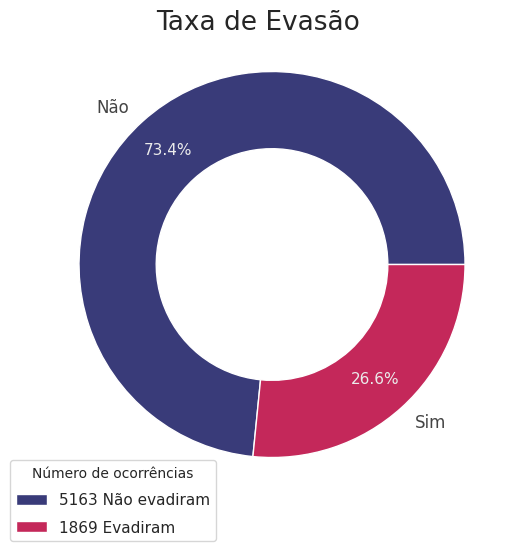

In [54]:
graph_churn_proportion()

### Evasão por Colunas Categóricas

A figura a seguir reúne gráficos que mostram a relação entre evasão e diferentes categorias, sendo um gráfico para cada variável categórica. Em cada caso, é apresentada a proporção de clientes em cada grupo e a respectiva taxa de evasão associada.

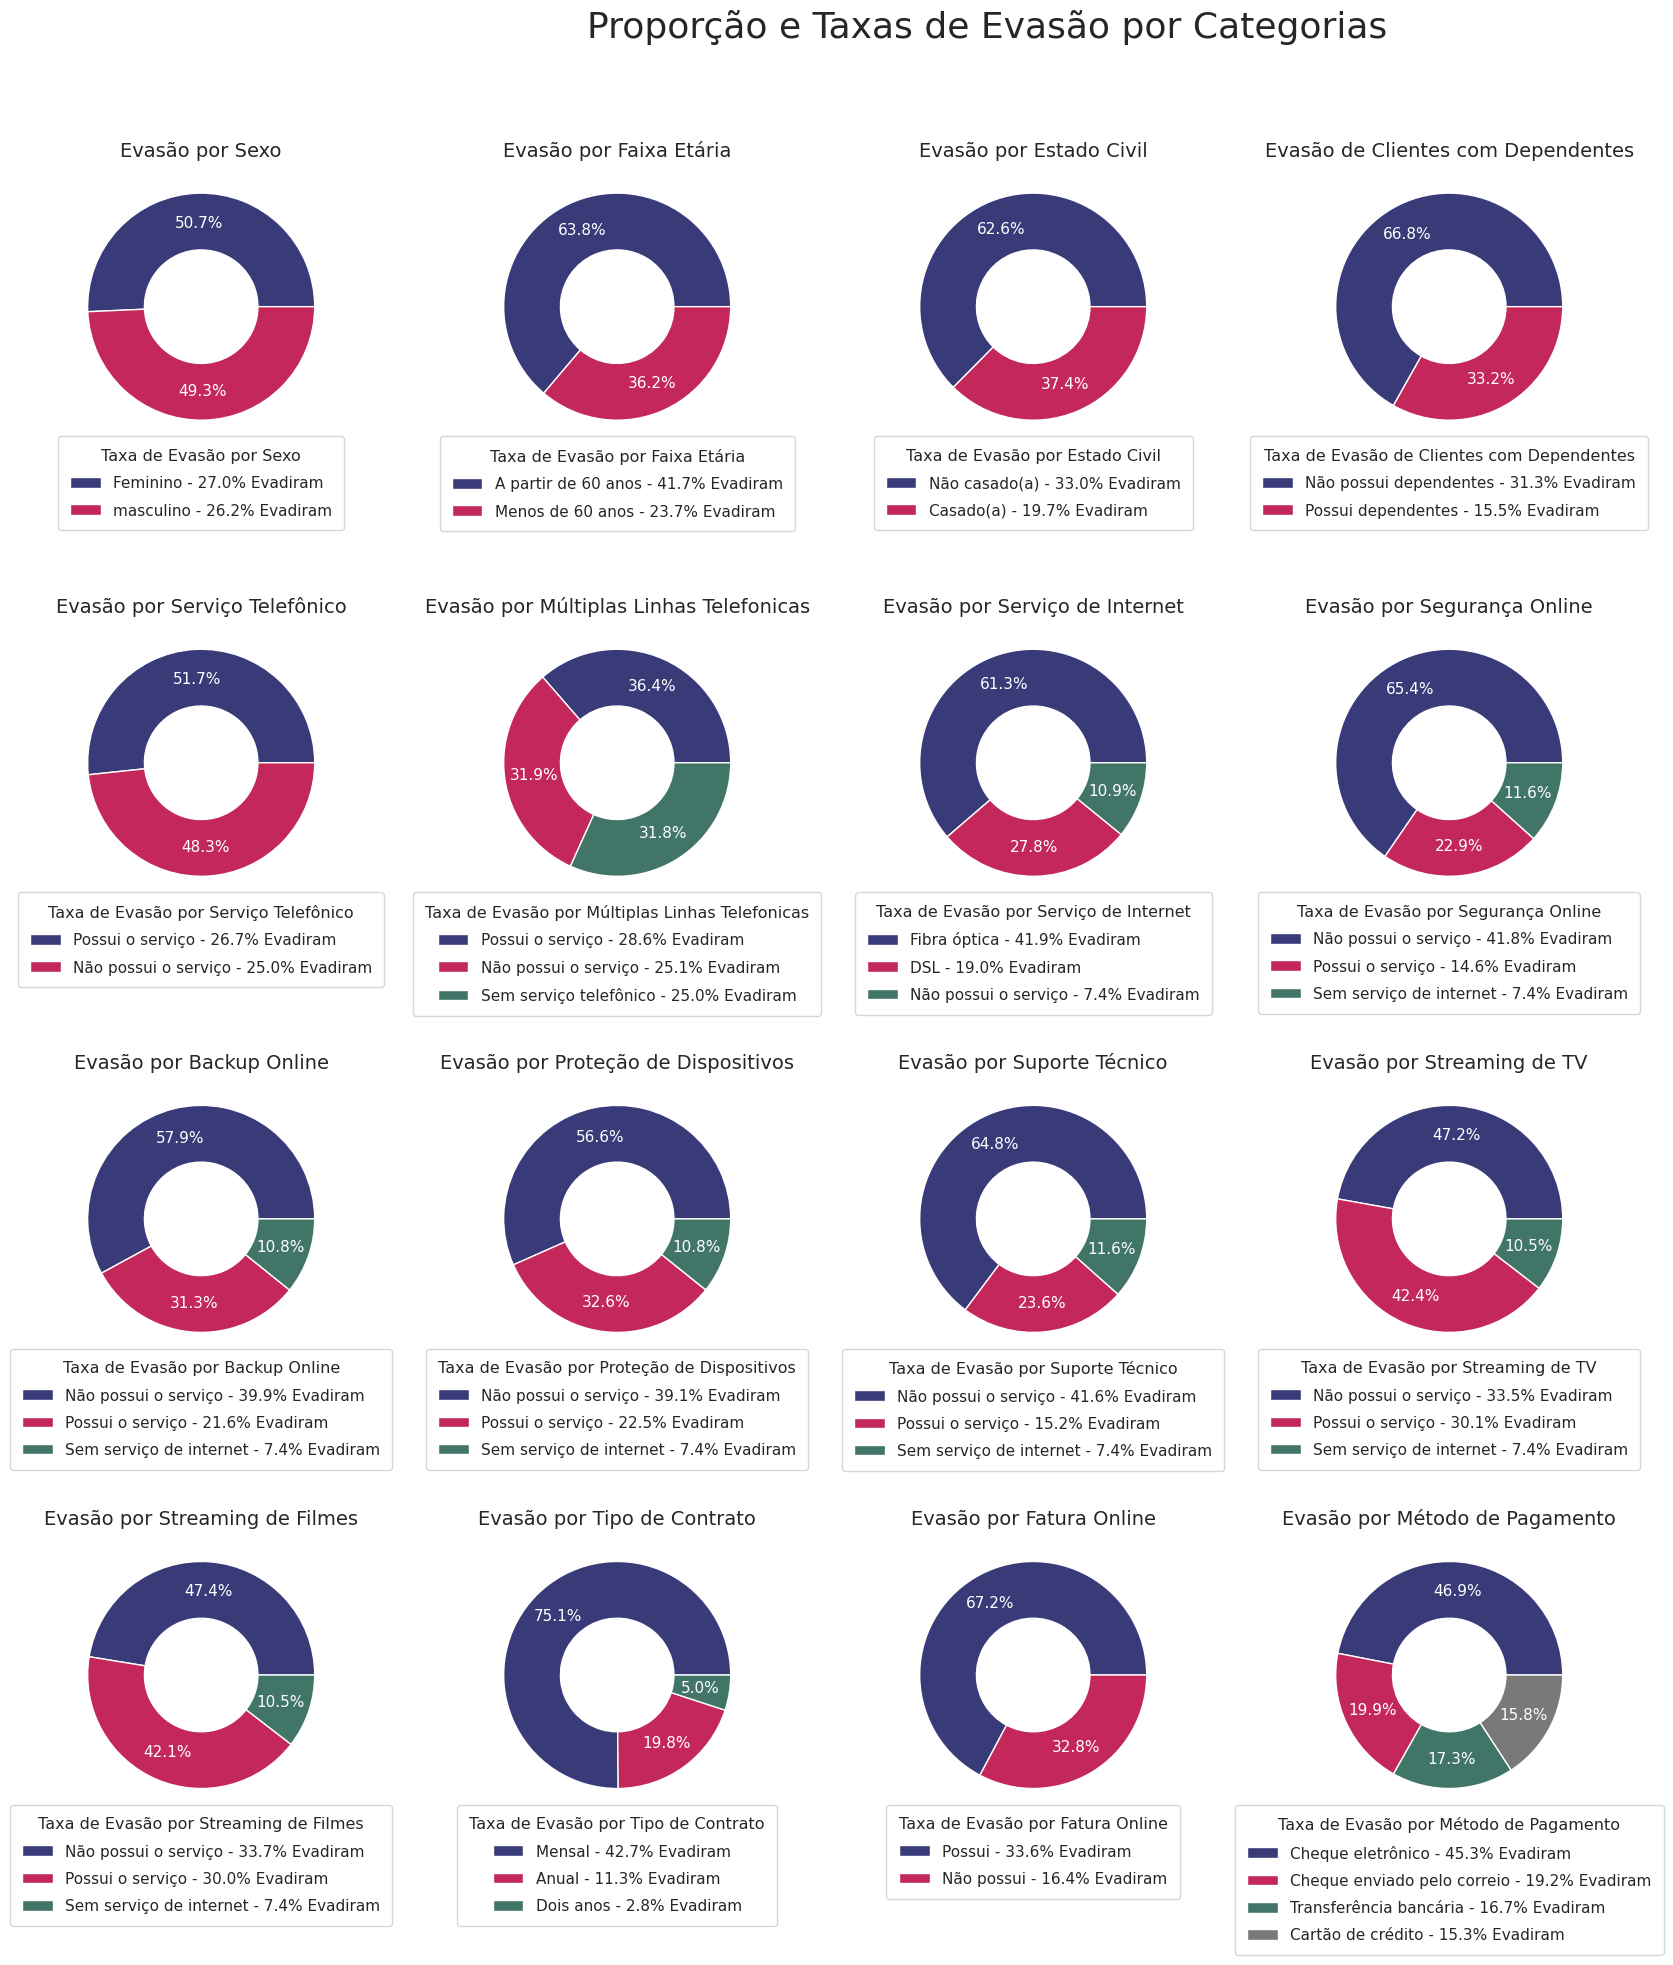

In [55]:
graph_churn_rates_categorical()

* **Sexo:** Entre os sexos, as taxas de evasão são muito próximas: 27,0% para mulheres e 26,2% para homens. Esses valores representam, respectivamente, 50,7% e 49,3% do total de evasões, indicando que o gênero não é um fator decisivo para a evasão.

* **Faixa Etária:** Embora a taxa de evasão seja mais alta entre clientes com 60 anos ou mais (41,7% contra 23,7% entre os mais jovens), o número absoluto de evasões é muito maior no grupo com menos de 60 anos (1.393 clientes), por representar a maioria da base de clientes. Assim, mesmo com uma taxa menor, esse grupo concentra a maior parte dos cancelamentos, como ilustrado nos dois gráficos de rosca abaixo.

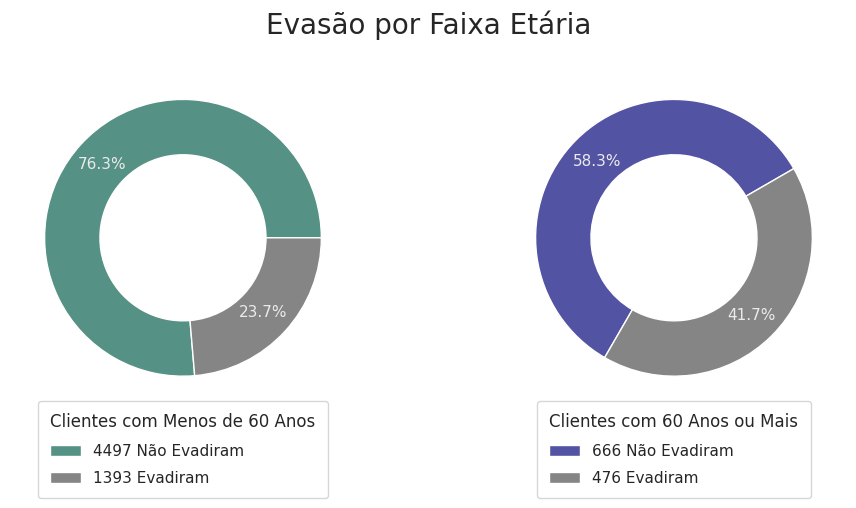

In [56]:
graph_churn_senior_citizen()

* **Estado Civil:** Clientes não casados apresentam uma taxa de evasão de 33,0%, consideravelmente superior à dos casados (19,7%). O que significa que os não casados representam 62,6% do total de evasões, sugerindo que o estado civil pode estar associado à fidelidade ao serviço.

* **Clientes com Dependentes:** A taxa de evasão entre clientes sem dependentes é de 31,3%, o dobro da observada entre os que possuem dependentes (15,5%). Esse grupo sem dependentes concentra 66,8% das evasões, evidenciando maior propensão à saída.

* **Serviço Telefônico:** As taxas de evasão são semelhantes entre quem possui (26,7%) e quem não possui serviço telefônico (25,0%). A distribuição total de evasões fica equilibrada, com pequena diferença na participação proporcional.

* **Múltiplas Linhas Telefônicas:** Clientes com múltiplas linhas apresentam taxa de evasão de 28,6%, acima dos que têm apenas uma linha (25,1%) e dos que não possuem serviço (25,0%). Apesar disso, a participação proporcional das evasões é relativamente equilibrada entre os grupos.

* **Serviço de Internet:** Clientes com internet via fibra óptica têm taxa de evasão de 41,9%, muito acima dos que usam DSL (19,0%) e dos que não possuem serviço (7,4%). Como resultado, concentram mais de 60% do total de evasões.

* **Segurança Online:** A taxa de evasão é de 41,8% para clientes que não possuem segurança online, contra 14,6% para os que possuem e 7,4% para os que não usam internet. Esse padrão se reflete na participação proporcional, com clara predominância dos que não possuem o serviço.

* **Backup Online:** Clientes sem backup apresentam taxa de evasão de 39,9%, muito maior que os que possuem (21,6%) ou não usam internet (7,4%). Esse grupo responde por mais da metade das evasões totais.

* **Proteção de Dispositivos:** Quem não possui proteção de dispositivos tem taxa de evasão de 39,1%, contrastando com 22,5% dos que possuem o serviço. A distribuição proporcional reforça a predominância do grupo sem proteção.

* **Suporte Técnico:** Clientes sem suporte técnico têm taxa de evasão de 41,6%, frente a 15,2% dos que possuem e 7,4% dos que não usam internet. A participação proporcional é fortemente dominada pelo grupo sem suporte.

* **Streaming de TV:** Entre clientes sem streaming de TV, a taxa de evasão é de 33,5%, enquanto os que possuem registram 30,1%. Os sem internet apresentam apenas 7,4%. O grupo sem streaming representa quase metade das evasões.

* **Streaming de Filmes:** A taxa de evasão para quem não possui o serviço é de 33,7%, maior que para os que possuem (30,0%) e muito superior aos que não têm internet (7,4%). A participação proporcional se mantém relativamente equilibrada entre os dois primeiros grupos.

* **Tipo de Contrato:** Clientes com contrato mensal têm a maior taxa de evasão (42,7%), bem acima dos contratos anuais (11,3%) e de dois anos (2,8%). Essa diferença se reflete diretamente na participação proporcional, com predominância absoluta de evasões em contratos mensais.

* **Fatura Online:** Quem possui fatura online apresenta taxa de evasão de 36,6%, mais que o dobro da taxa dos que não possuem (16,4%). Apesar disso, concentram dois terços do total de evasões, possivelmente por serem maioria entre os clientes.

* **Método de Pagamento:** Clientes que pagam via cheque eletrônico apresentam a maior taxa de evasão (45,3%), seguidos por cheque enviado pelo correio (19.2%)transferência bancária (16,7%), cartão de crédito (15,3%).

### Cruzando Variáveis Categóricas

#### Evasão por Faixa Etária e Tipo de Contrato

O gráfico abaixo mostra que, em todos os tipos de contrato, clientes com 60 anos ou mais apresentam maior taxa de evasão. A diferença é mais expressiva nos contratos mensais, algo em torno de 55% entre os clientes idosos e próximo de 40% entre os mais jovens, enquanto nos anuais e de dois anos as taxas são muito menores para ambos os grupos.

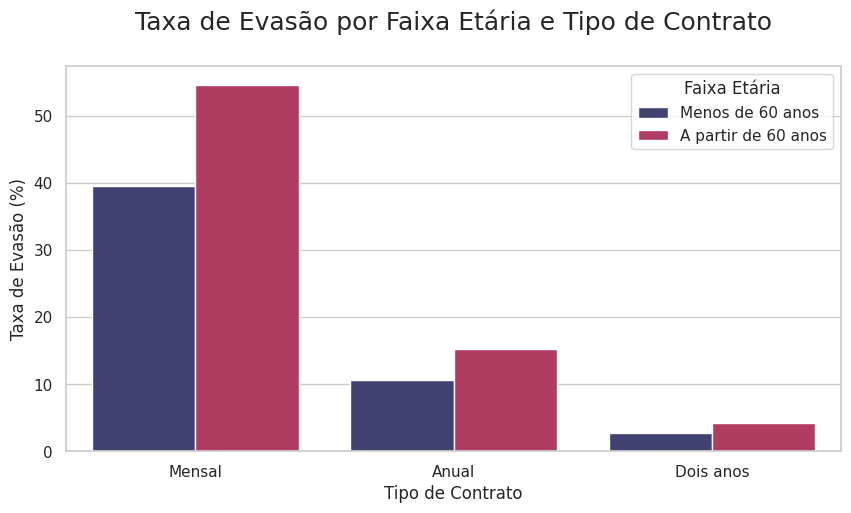

In [57]:
graph_churn_senior_contract()

#### Evasão por Estado Civil e Tipo de Contrato

O próximo gráfico mostra que, nos contratos mensais, a taxa de evasão é mais alta para não casados, cerca de 45% e um pouco menor para casados, próximo de 39%. Já nos contratos anuais e de dois anos, as taxas também são significativamente menores para ambos os grupos.

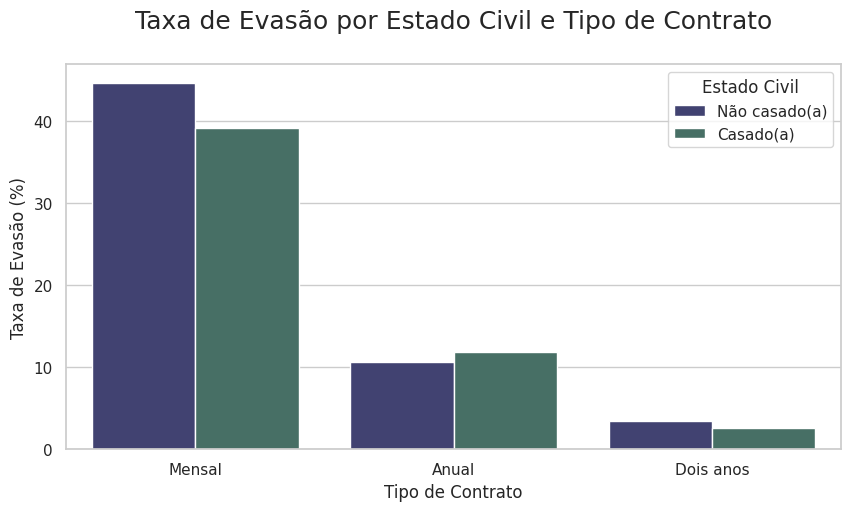

In [58]:
graph_churn_partner_contract()

#### Evasão por Tipo de Contrato e Método de Pagamento

Os contratos mensais continuam apresentando as maiores taxas de evasão entre os métodos de pagamento, com destaque para o pagamento com cheque eletrônico, que ultrapassa 50%. Nos demais métodos, essas taxas variam entre aproximadamente 31% e 34%. Já os contratos anuais e de dois anos mantêm índices bem menores, embora o cheque eletrônico ainda concentre as maiores taxas mesmo nesses casos, como mostrado no gráfico a seguir.

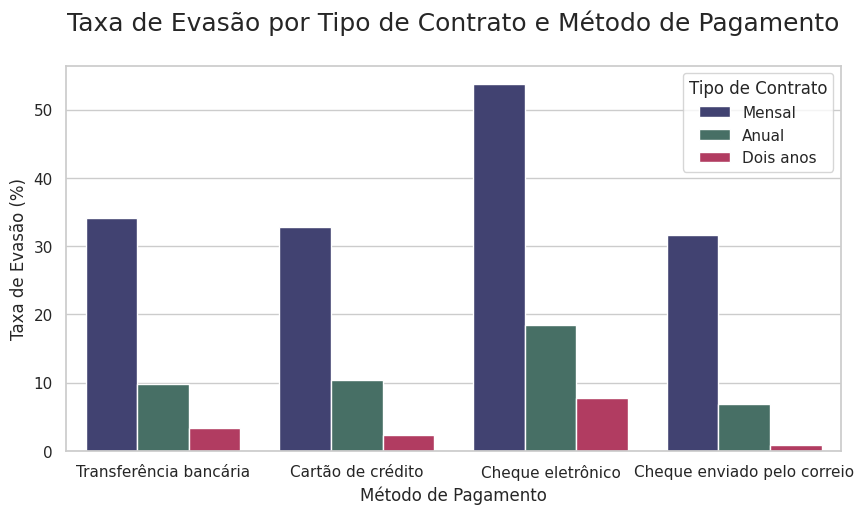

In [59]:
graph_churn_contract_payment()

#### Evasão por Serviço de Internet e Método de Pagamento

Clientes que pagam com cheque eletrônico também apresentam taxa de evasão acima de 50% entre os usuários de internet por fibra óptica, seguidos pelo pagamento por cheque enviado pelos correios, que ultrapassa 40% no mesmo serviço de internet. No DSL, o cheque eletrônico também concentra a maior taxa, com pouco mais de 30%. Nos demais métodos, a internet por fibra óptica mantém índices de evasão superiores aos demais serviços, como pode ser observado no gráfico abaixo.

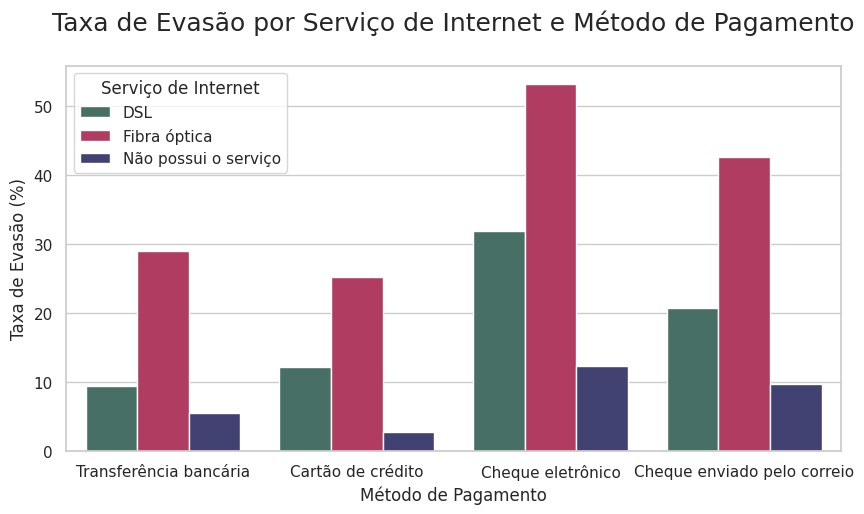

In [60]:
graph_churn_internet_payment()

### Evasão por Variáveis Numéricas

#### Cobrança Mensal por Serviço de Internet

Clientes que utilizam o serviço de internet por fibra óptica apresentam o valor médio de cobrança mensal mais alto, seguido pelos usuários de DSL, enquanto aqueles que não possuem serviço de internet têm a menor cobrança mensal, com diferença significativa em relação aos demais grupos.

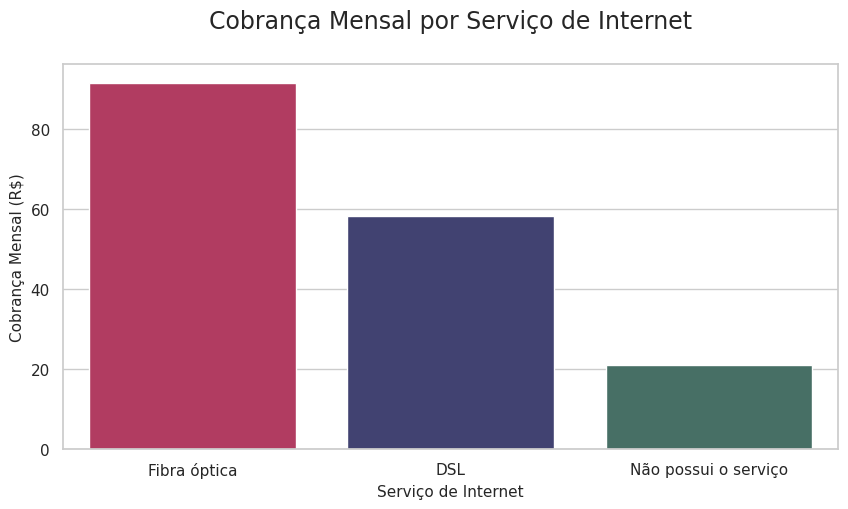

In [61]:
graph_charges_monthly_internet()

#### Evasão por Cobrança Mensal e Faixa Etária

O gráfico seguinte indica que, entre os clientes que não evadiram, o valor médio da cobrança mensal é de aproximadamente 60,00 reais para os com menos de 60 anos e próximo de 85,00 reais para aqueles com 60 anos ou mais. Já entre os que evadiram, as médias se aproximam de 78,00 e 85,00 reais, respectivamente. Observa-se também que a variação nos valores é maior entre clientes com menos de 60 anos, especialmente no grupo que permaneceu.

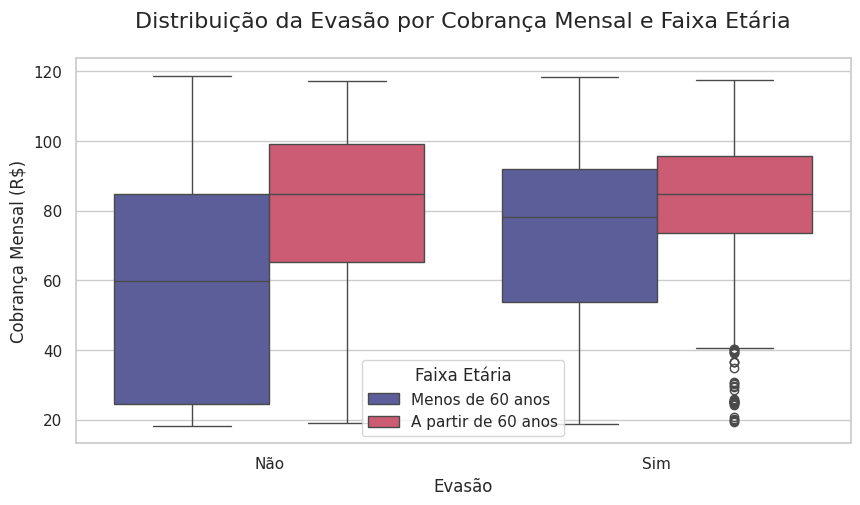

In [62]:
graph_churn_monthly_senior()

#### Evasão por Cobrança Mensal e Estado Civil

Como pode ser observado no próximo gráfico, entre os clientes que não evadiram, o valor médio da cobrança mensal é de cerca de 70,00 reais para casados e 56,00 reais para não casados. Já entre os que evadiram, as médias sobem para aproximadamente 84,00 e 75,00 reais, respectivamente. Nota-se ainda que, no grupo de evadidos, os valores pagos pelos casados se mantêm mais concentrados em faixas mais altas, enquanto entre os não casados há maior dispersão nos valores pagos.

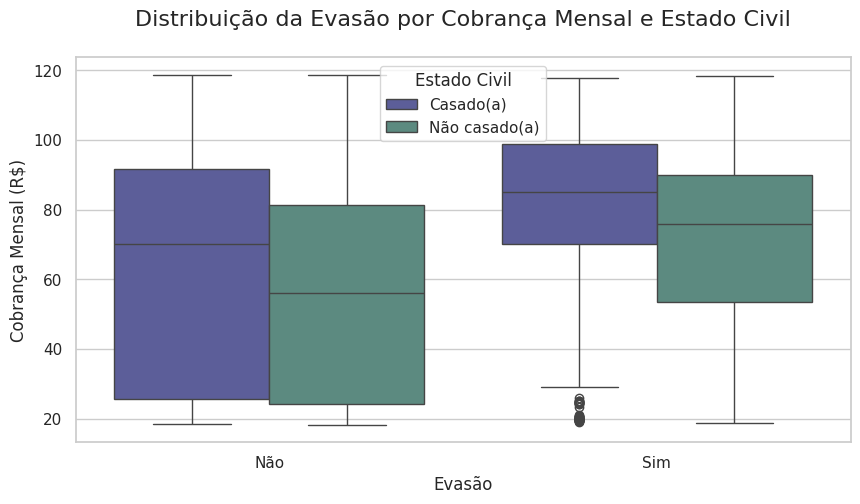

In [63]:
graph_churn_monthly_partner()

#### Evasão por Tempo de Permanência

Como mostrado no gráfico de evasão por tempo de permanência, a quantidade de evasões é maior nos primeiros meses de contrato e diminui gradualmente conforme o tempo de permanência aumenta. Clientes com mais de 60 meses de vínculo apresentam baixíssima evasão, enquanto a quantidade de clientes que permanecem ativos cresce de forma significativa nesse período.

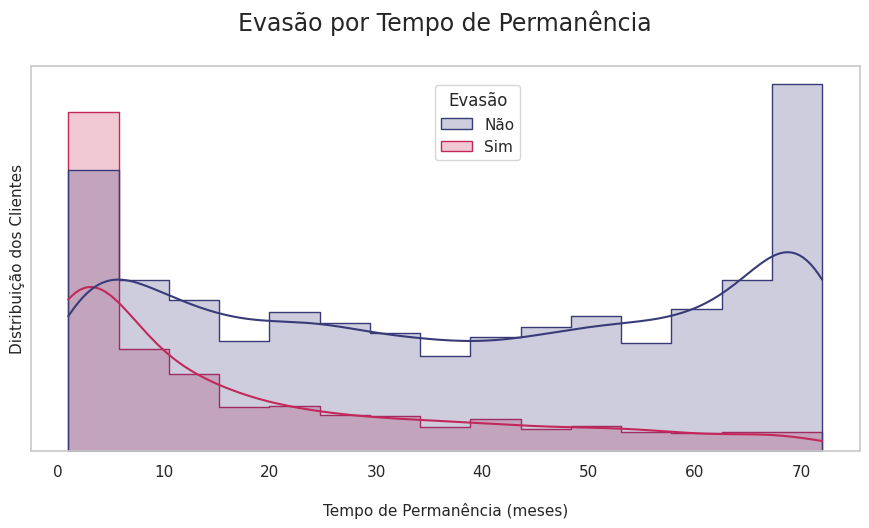

In [64]:
graph_churn_tenure_hist()

#### Evasão por Tempo de Permanência e Cobrança Mensal

O gráfico de evasão por tempo de permanência e cobrança mensal, mostra que clientes que evadiram apresentam, em todo o período, valores de cobrança mensal superiores aos que permaneceram. Essa diferença é evidente desde os primeiros meses e se mantém ao longo do tempo, o que possivelmente está relacionado ao tipo de serviço contratado, já que a maior parte das evasões ocorre entre usuários de internet por fibra óptica, que possui custo mais elevado.

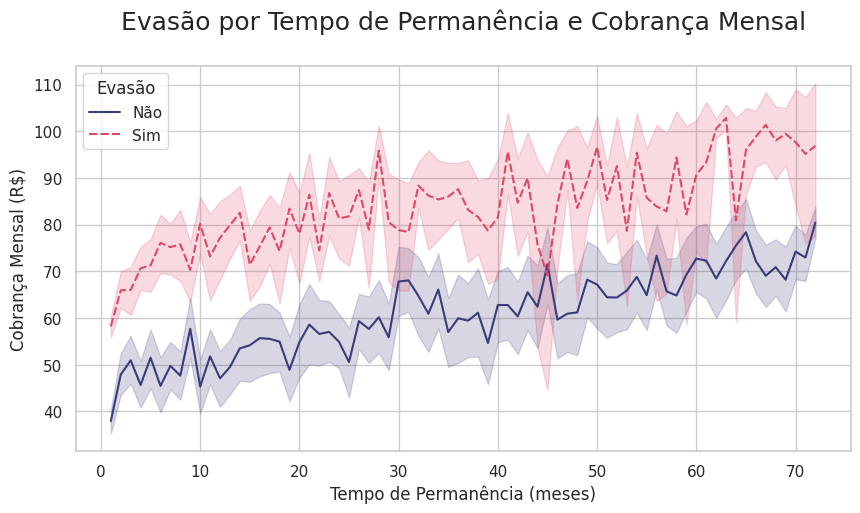

In [65]:
lineplot('Charges.Monthly')

#### Evasão por Tempo de Permanência e Cobrança Total

O gráfico  a seguir, mostra que clientes que evadem mais cedo tendem a apresentar cobranças totais muito mais baixas, já que permanecem pouco tempo e acumulam menos pagamentos. Em contrapartida, aqueles que permanecem por mais tempo geram cobranças totais significativamente maiores ao longo do contrato, reforçando o impacto financeiro negativo da evasão precoce.

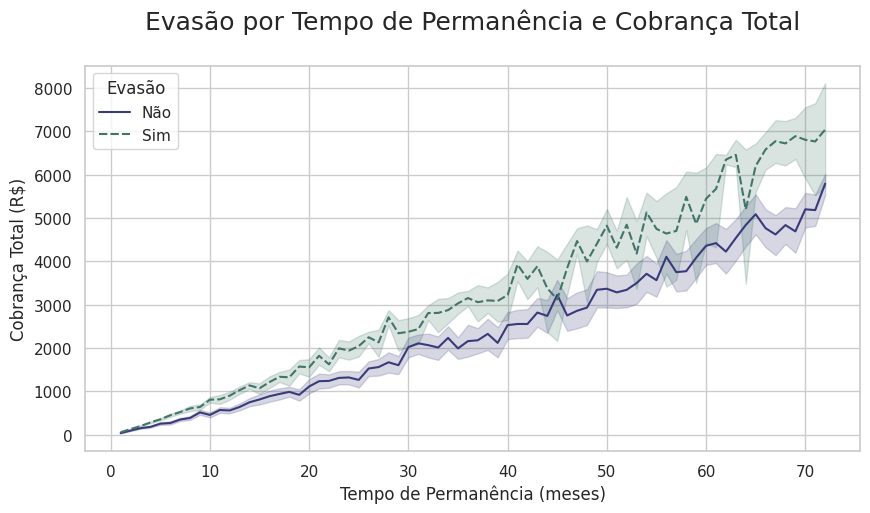

In [66]:
lineplot('Charges.Total', (purple_1, green_1))

## Conclusão

A evasão de 26,5% representa um volume significativo de clientes e concentrado em grupos específicos. Contratos mensais, clientes sem serviços adicionais, usuários de internet por fibra óptica e clientes que utilizam cheque eletrônico como método de pagamento apresentam as maiores taxas de cancelamento. Também se destacam taxas elevadas entre idosos, não casados e clientes sem dependentes. Além disso, a evasão é mais frequente nos primeiros meses de contrato, especialmente entre aqueles com cobranças mensais mais altas. Esses padrões indicam a necessidade de estratégias direcionadas para retenção, focando nos perfis e serviços mais associados à saída e prevenindo o cancelamento precoce.

## Insights

* Contratos mensais concentram a maior parte das evasões.

* A ausência de serviços complementares (segurança online, backup, proteção de dispositivos, suporte técnico) está fortemente associada a maiores índices de cancelamento.

* Cheque eletrônico é o método de pagamento mais associado à evasão.

* Planos de fibra óptica, com custo mais alto, apresentam maior cancelamento.

* Idosos, não casados e sem dependentes têm maior propensão à saída.

* A evasão ocorre principalmente nos primeiros meses de contrato.

* Clientes que cancelam costumam ter cobrança mensal mais alta.

## Recomendações

* Revisão de planos e preços para clientes com contrato mensal, oferecendo descontos ou incentivos para migração para contratos anuais ou de dois anos.

* Campanhas de fidelização para usuários de internet por fibra óptica.

* Incentivar a contratação de serviços complementares (segurança online, backup, suporte técnico), que estão associados a taxas menores de evasão.

* Revisar métodos de pagamento, incentivando a substituição do cheque eletrônico por opções mais estáveis, como débito automático.

* Ações específicas para os primeiros meses de contrato, como atendimento proativo e ofertas personalizadas, para reduzir o alto índice de cancelamentos nesse período.

* Estratégias personalizadas para idosos, não casados e clientes sem dependentes, que apresentaram taxas significativamente maiores de evasão.